In [6]:
import numpy as np
import pandas as pd

In [7]:
# Try different encodings to read the CSV file
possible_encodings = ['utf-8', 'latin1', 'ISO-8859-1', 'utf-16', 'utf-32']

file_path = "/Users/vipul/Downloads/Projects/Bharat Intern/spam.csv"
successful = False
for encoding in possible_encodings:
    try:
        df = pd.read_csv(file_path, encoding=encoding)
        successful = True
        print(f"File successfully read with encoding: {encoding}")
        break
    except UnicodeDecodeError:
        print(f"Failed to read with encoding: {encoding}")
        continue

if not successful:
    print("Unable to read the file. None of the tried encodings worked.")

Failed to read with encoding: utf-8
File successfully read with encoding: latin1


In [8]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
df.shape

(5572, 5)

# Data Cleaning

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [11]:
# dropping last 3 columns

df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [12]:
df.sample(5)

,v1,v2
4754,ham,U wan 2 haf lunch i'm in da canteen now.
5123,ham,"Hi Chikku, send some nice msgs"
2109,ham,Lara said she can loan me &lt;#&gt; .
4317,ham,S...i will take mokka players only:)
1959,ham,Howz that persons story


In [13]:
# Re-naming the Columns v1---> Target and v2---> Text

df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)

In [14]:
df.sample(5)

,Target,Text
2387,ham,Also where's the piece
3668,ham,Yeah imma come over cause jay wants to do some...
4789,ham,Yup. Izzit still raining heavily cos i'm in e ...
5389,ham,Ok.ok ok..then..whats ur todays plan
2694,ham,Hey sexy buns! What of that day? No word from ...


In [15]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [16]:
df['Target'] = encoder.fit_transform(df['Target'])

In [17]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
# missing values

df.isnull().sum()

Target    0
Text      0
dtype: int64

In [19]:
# duplicate values

df.duplicated().sum()

403

In [20]:
# remove duplicates

df = df.drop_duplicates(keep='first')

In [21]:
# checking duplicate values again

df.duplicated().sum()

0

In [22]:
df.shape

(5169, 2)

# EDA

In [23]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

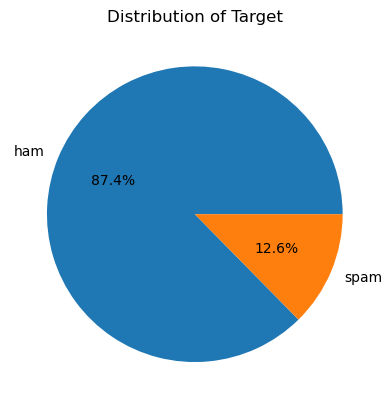

In [24]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(), labels = ['ham','spam'],autopct="%1.1f%%")
plt.title('Distribution of Target')
plt.show()

In [25]:
# Data is imbalanced

In [26]:
import nltk

In [27]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/vipul/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
# Number of Characters
df['Num_Characters'] = df['Text'].apply(len)

In [29]:
df.head()

,Target,Text,Num_Characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [30]:
df['Num_Words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [31]:
df.head()

,Target,Text,Num_Characters,Num_Words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [32]:
df['Num_Sentences'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [33]:
df.head()

,Target,Text,Num_Characters,Num_Words,Num_Sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [34]:
df[['Num_Characters','Num_Words','Num_Sentences']].describe()

,Num_Characters,Num_Words,Num_Sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
# For ham

df[df['Target']==0][['Num_Characters','Num_Words','Num_Sentences']].describe()

,Num_Characters,Num_Words,Num_Sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [36]:
# For spam

df[df['Target']==1][['Num_Characters','Num_Words','Num_Sentences']].describe()

,Num_Characters,Num_Words,Num_Sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


# Data Pre-Processing

Lower Case

Tokenization

Removing Special Characters

Removing Stop Words and Punctuation

Stemming


In [40]:
import string
from nltk.corpus import stopwords

In [41]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem("Loving")

'love'

In [42]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not  in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    
    return " ".join(y)

In [43]:
transform_text(df['Text'][50])

'think first time saw class'

In [44]:
df['Transform_Text'] = df['Text'].apply(transform_text)

In [45]:
df.head()

,Target,Text,Num_Characters,Num_Words,Num_Sentences,Transform_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [46]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [47]:
from wordcloud import WordCloud
wc = WordCloud(width=1000, height=1000, min_font_size= 10, background_color='white')

In [48]:
spam_wc = wc.generate(df[df['Target'] == 1]['Transform_Text'].str.cat(sep=" "))

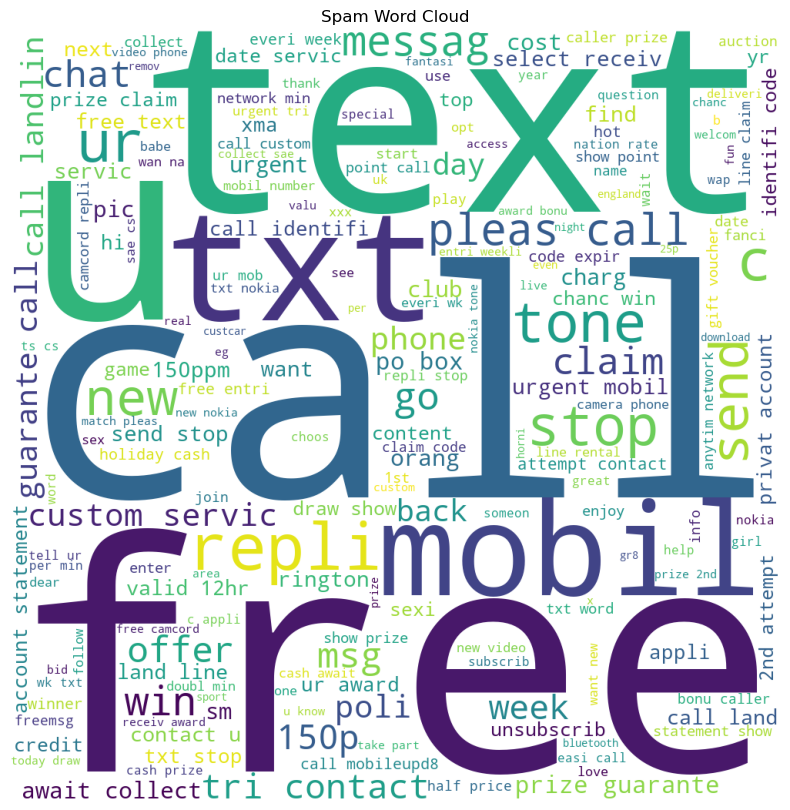

In [56]:
plt.figure(figsize=(10,10))
plt.title("Spam Word Cloud")
plt.axis("off")
plt.imshow(spam_wc)
plt.show()

In [57]:
ham_wc = wc.generate(df[df['Target'] == 0]['Transform_Text'].str.cat(sep=" "))

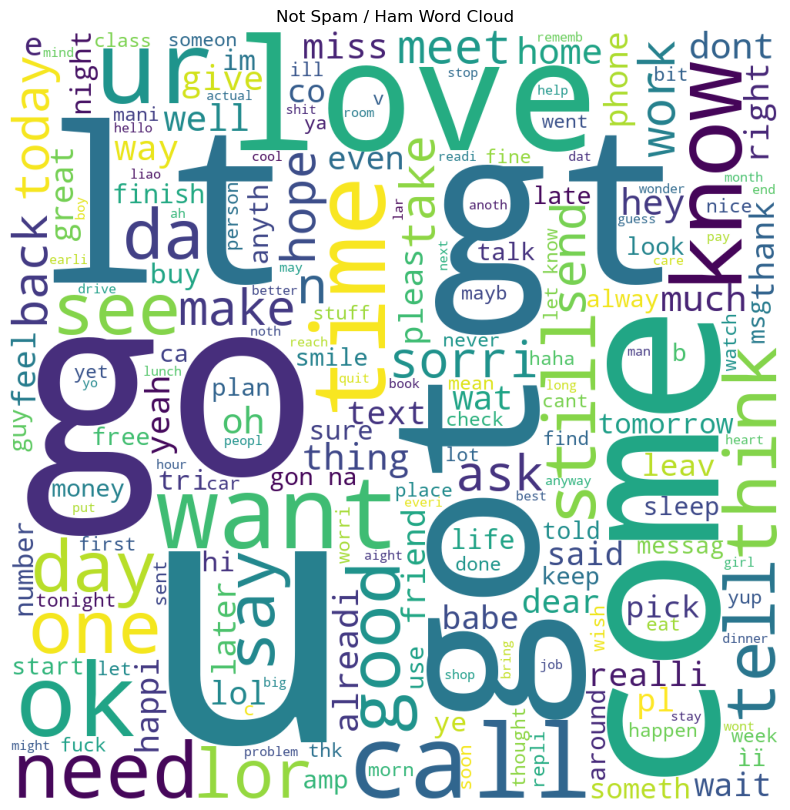

In [59]:
plt.figure(figsize=(10,10))
plt.title("Not Spam / Ham Word Cloud")
plt.axis("off")
plt.imshow(ham_wc)
plt.show()

In [60]:
#collects all spam major words

spam_corpus = []
for msg in df[df['Target'] == 1]['Transform_Text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [61]:
len(spam_corpus)  # Total spam words

9939

In [62]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [67]:
from collections import Counter
import seaborn as sns

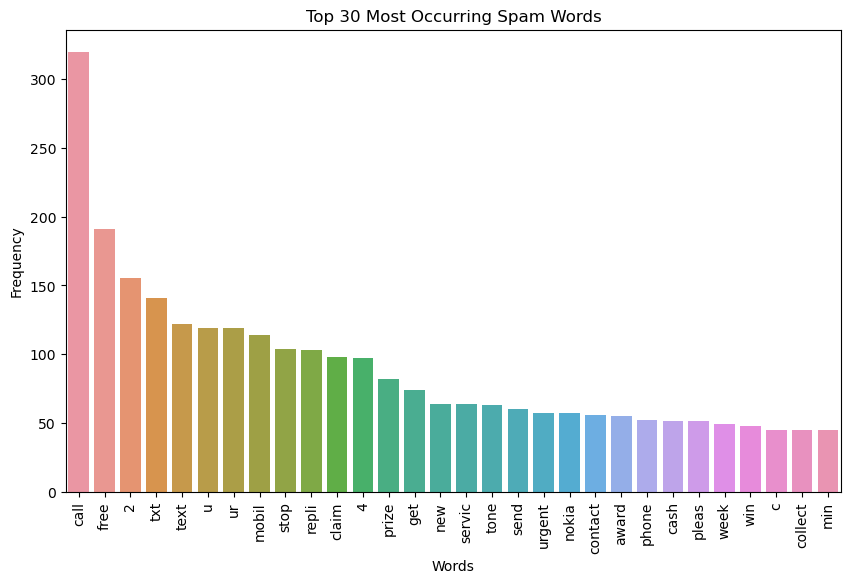

In [68]:
# Generate Counter for the spam_corpus
spam_counter = Counter(spam_corpus)

# Extract the top 30 most common words and convert them into a DataFrame
top_30_spam_words = pd.DataFrame(spam_counter.most_common(30), columns=['Word', 'Frequency'])

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=top_30_spam_words, x='Word', y='Frequency')
plt.xticks(rotation='vertical')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 30 Most Occurring Spam Words')
plt.show()

In [69]:
#collects all ham major words

ham_corpus = []
for msg in df[df['Target'] == 0]['Transform_Text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [70]:
len(ham_corpus)  # Total ham words

35404

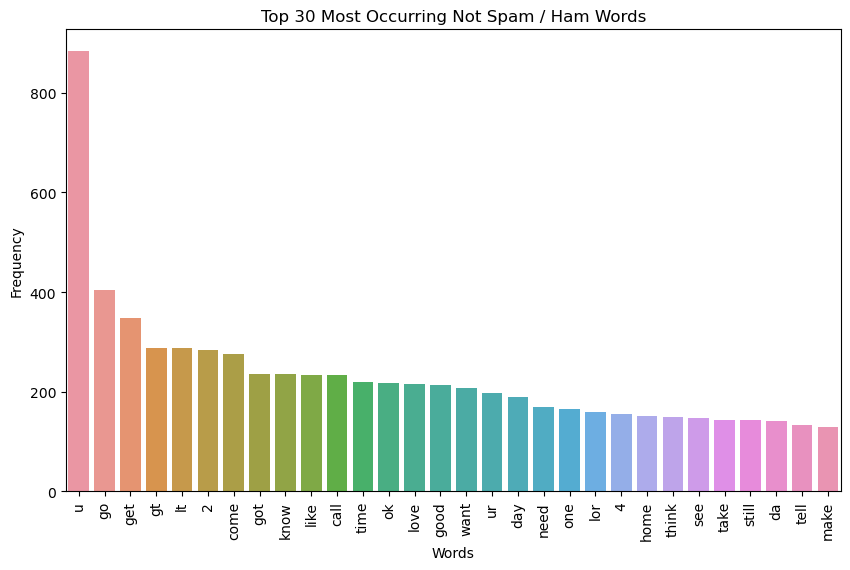

In [95]:
# Generate Counter for the ham_corpus
ham_counter = Counter(ham_corpus)

# Extract the top 30 most common words and convert them into a DataFrame
top_30_ham_words = pd.DataFrame(ham_counter.most_common(30), columns=['Word', 'Frequency'])

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=top_30_ham_words, x='Word', y='Frequency')
plt.xticks(rotation='vertical')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 30 Most Occurring Not Spam / Ham Words')
plt.show()

# Model Building

In [72]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [73]:
X = tfidf.fit_transform(df['Transform_Text']).toarray()

In [74]:
X.shape

(5169, 3000)

In [75]:
y = df['Target'].values

In [76]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [77]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [78]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test,y_pred1))
print()
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred1))
print()
print('Precision Score:',precision_score(y_test,y_pred1))

Accuracy Score: 0.8694390715667312

Confusion Matrix:
 [[788 108]
 [ 27 111]]

Precision Score: 0.5068493150684932


In [79]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test,y_pred2))
print()
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred2))
print()
print('Precision Score:',precision_score(y_test,y_pred2))

Accuracy Score: 0.9709864603481625

Confusion Matrix:
 [[896   0]
 [ 30 108]]

Precision Score: 1.0


In [80]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test,y_pred3))
print()
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred3))
print()
print('Precision Score:',precision_score(y_test,y_pred3))

Accuracy Score: 0.9835589941972921

Confusion Matrix:
 [[895   1]
 [ 16 122]]

Precision Score: 0.991869918699187


In [81]:
# tfidf --> MNB

In [82]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [85]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [86]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [87]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [88]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [89]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9332688588007737
Precision -  0.8415841584158416
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [90]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [91]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [92]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [93]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.960348
7,xgb,Accuracy,0.967118
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


/Users/vipul/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


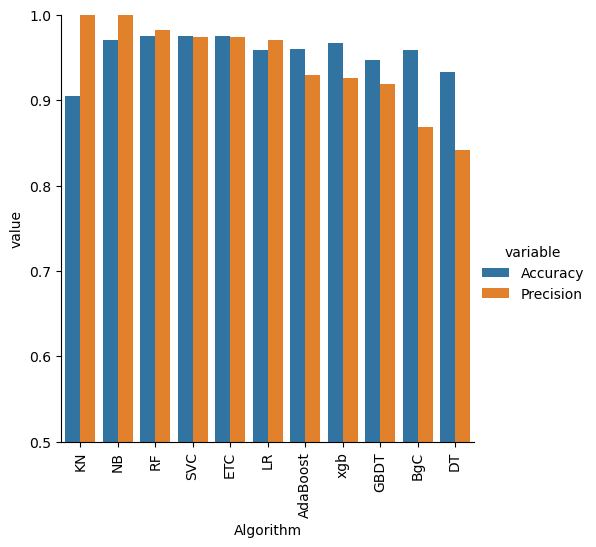

In [94]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [96]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [97]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [98]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [99]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [100]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [101]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [102]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
7,xgb,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230
8,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
9,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217


In [105]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [106]:
from sklearn.ensemble import VotingClassifier

In [107]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [108]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [109]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [110]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [111]:
from sklearn.ensemble import StackingClassifier

In [112]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [113]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9465648854961832


In [114]:
import pickle
pickle.dump(tfidf,open('/Users/vipul/Downloads/Projects/Bharat Intern/vectorizer.pkl','wb'))
pickle.dump(mnb,open('/Users/vipul/Downloads/Projects/Bharat Intern/model.pkl','wb'))